In [105]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [106]:
data_dir = '/kaggle/input/caltech101/101_ObjectCategories'

In [107]:
image_size = (224, 224)
batch_size = 32

In [108]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

Found 7818 images belonging to 102 classes.


In [109]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1326 images belonging to 102 classes.


In [110]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  
predictions = Dense(102, activation='softmax')(x)

In [111]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 25
h=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]  
)

Epoch 1/25
244/244 [==============================] - 138s 543ms/step - loss: 4.4109 - accuracy: 0.3309 - val_loss: 2.8801 - val_accuracy: 0.5168 - lr: 1.0000e-05
Epoch 2/25
244/244 [==============================] - 127s 518ms/step - loss: 3.3240 - accuracy: 0.5781 - val_loss: 2.2203 - val_accuracy: 0.6265 - lr: 1.0000e-05
Epoch 3/25
244/244 [==============================] - 126s 518ms/step - loss: 2.7962 - accuracy: 0.6808 - val_loss: 1.9367 - val_accuracy: 0.6829 - lr: 1.0000e-05
Epoch 4/25
244/244 [==============================] - 127s 518ms/step - loss: 2.6624 - accuracy: 0.7460 - val_loss: 1.7140 - val_accuracy: 0.7378 - lr: 1.0000e-05
Epoch 5/25
244/244 [==============================] - 127s 522ms/step - loss: 2.8817 - accuracy: 0.7910 - val_loss: 1.5902 - val_accuracy: 0.7660 - lr: 1.0000e-05
Epoch 6/25
244/244 [==============================] - 125s 512ms/step - loss: 2.4388 - accuracy: 0.8235 - val_loss: 1.6668 - val_accuracy: 0.7546 - lr: 1.0000e-05
Epoch 7/25
244/244 [==

In [209]:

from tensorflow.keras.preprocessing.image import load_img
image = load_img('/kaggle/input/caltech101/101_ObjectCategories/BACKGROUND_Google/image_0016.jpg', target_size=(224, 224)) 

In [210]:
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(image)

In [211]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [212]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image)

In [213]:
import numpy as np
pred = model.predict(image) 
predicted_class_index = np.argmax(pred,axis=-1)
class_labels = list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index[0]]

print(predicted_class_label)

1/1 [==============================] - 0s 20ms/step
BACKGROUND_Google


In [214]:
print(pred)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


In [126]:
print(list(train_generator.class_indices.keys()))

['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

In [127]:
import matplotlib.pyplot as plt

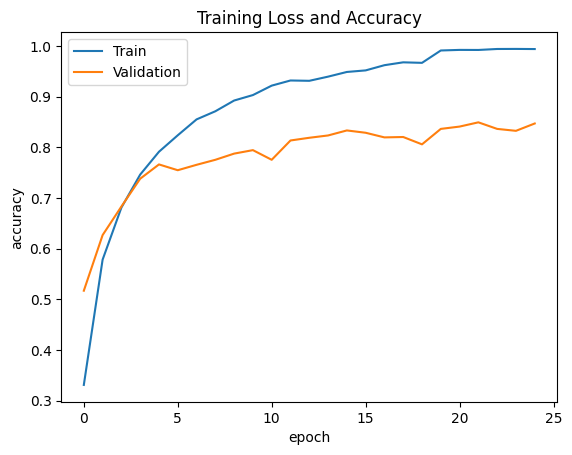

In [128]:
plt.plot(h.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_accuracy'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])

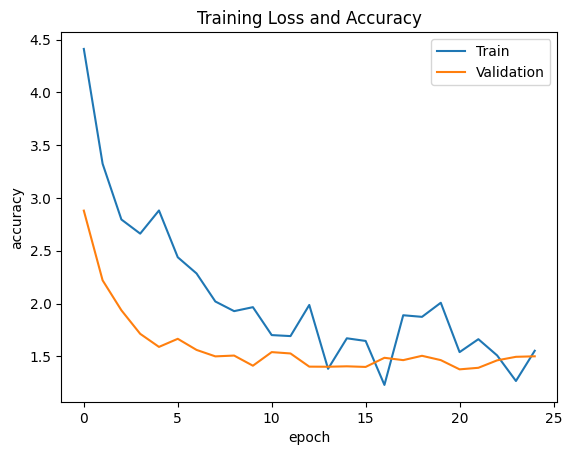

In [129]:
plt.plot(h.history['loss']) #get the accuracy for the training set from the model's history attribute
plt.plot(h.history['val_loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])